In [1]:
#This notebook models the daily sunspot data

In [2]:
import pandas as pd
import numpy as np
import scipy as py

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 144
plt.rcParams['figure.figsize'] = 14, 10

In [3]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [4]:
sunspots_day = pd.read_csv('SIDC-SUNSPOTS_D.csv')
sunspots_month = pd.read_csv('SIDC-SUNSPOTS_13.csv')

In [5]:
sunspots_day.Date = pd.to_datetime(sunspots_day.Date)
sunspots_day.index = sunspots_day.Date
sunspots_day.sort_values('Date', ascending=True, inplace = True)
sunspots_day.head()

,Date,Daily Sunspot Number,Standard Deviation,Number of Observations,Definitive/Provisional Indicator
Date,,,,,
1818-01-08,1818-01-08,65.0,10.2,1.0,1.0
1818-01-13,1818-01-13,37.0,7.7,1.0,1.0
1818-01-17,1818-01-17,77.0,11.1,1.0,1.0
1818-01-18,1818-01-18,98.0,12.6,1.0,1.0
1818-01-19,1818-01-19,105.0,13.0,1.0,1.0


In [6]:
sunspots_day.tail()

,Date,Daily Sunspot Number,Standard Deviation,Number of Observations,Definitive/Provisional Indicator
Date,,,,,
2017-07-27,2017-07-27,0.0,0.0,33.0,0.0
2017-07-28,2017-07-28,11.0,1.5,17.0,0.0
2017-07-29,2017-07-29,16.0,7.7,11.0,0.0
2017-07-30,2017-07-30,15.0,5.0,33.0,0.0
2017-07-31,2017-07-31,0.0,0.0,40.0,0.0


In [7]:
sunspots_month.Date = pd.to_datetime(sunspots_month.Date)
sunspots_month.index = sunspots_month.Date
sunspots_month.sort_values('Date', ascending=True, inplace = True)
sunspots_month.head()

,Date,13-Month Smoothed Total Sunspot Number,Monthly Mean Standard Deviation,Number of Observations,Definitive/Provisional Indicator
Date,,,,,
1749-01-31,1749-01-31,NaN,NaN,NaN,1.0
1749-02-28,1749-02-28,NaN,NaN,NaN,1.0
1749-03-31,1749-03-31,NaN,NaN,NaN,1.0
1749-04-30,1749-04-30,NaN,NaN,NaN,1.0
1749-05-31,1749-05-31,NaN,NaN,NaN,1.0


In [8]:
sunspots_month.tail()

,Date,13-Month Smoothed Total Sunspot Number,Monthly Mean Standard Deviation,Number of Observations,Definitive/Provisional Indicator
Date,,,,,
2017-03-31,2017-03-31,NaN,NaN,1011.0,0.0
2017-04-30,2017-04-30,NaN,NaN,831.0,0.0
2017-05-31,2017-05-31,NaN,NaN,1020.0,0.0
2017-06-30,2017-06-30,NaN,NaN,947.0,0.0
2017-07-31,2017-07-31,NaN,NaN,958.0,0.0


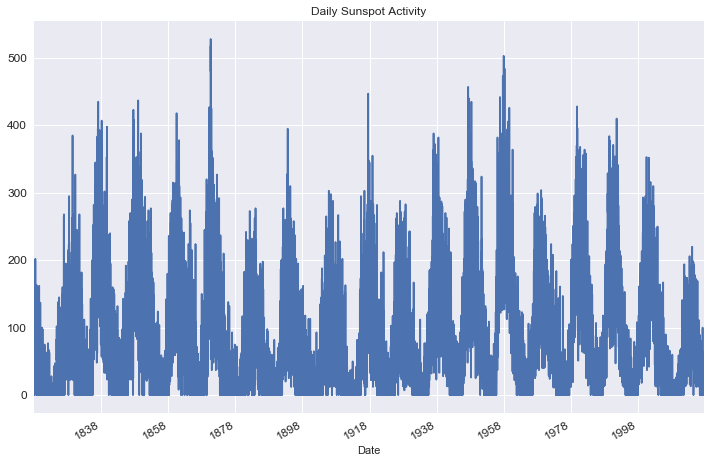

In [9]:
sunspots_day['Daily Sunspot Number'].plot(figsize=(12,8), title= 'Daily Sunspot Activity', fontsize=12)

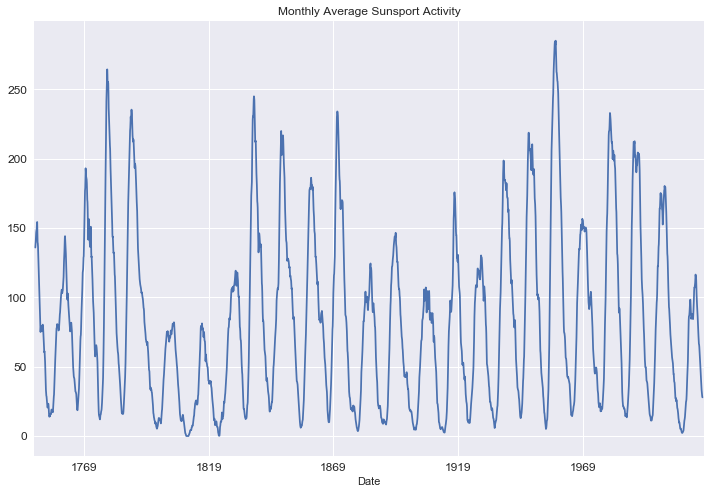

In [10]:
sunspots_month['13-Month Smoothed Total Sunspot Number'].plot(figsize=(12,8), 
                                                              title= 'Monthly Average Sunsport Activity', 
                                                              fontsize=12)

In [11]:
#creating X and y data

In [12]:
y = sunspots_day['Daily Sunspot Number']
y.dropna(inplace = True)
y.head()

Date
1818-01-08     65.0
1818-01-13     37.0
1818-01-17     77.0
1818-01-18     98.0
1818-01-19    105.0
Name: Daily Sunspot Number, dtype: float64

In [13]:
X = [x for x in range(0, len(y))]
print(X)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

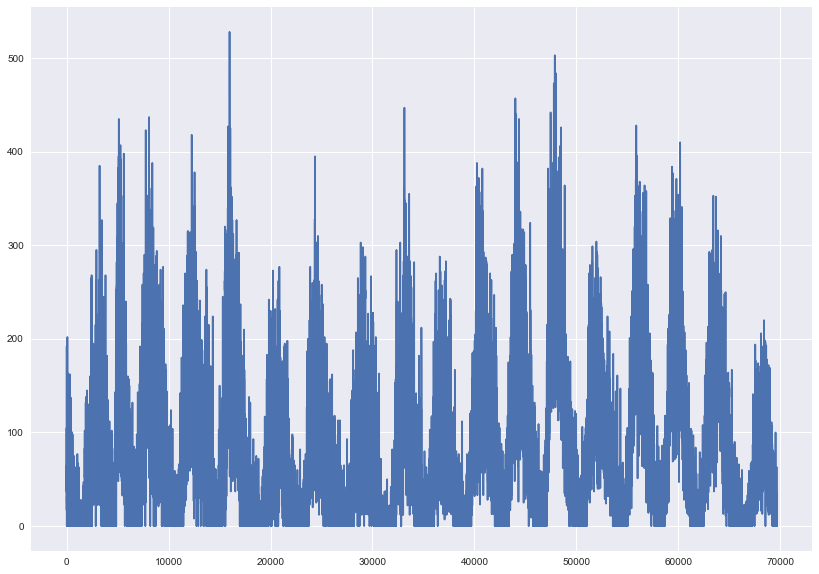

In [14]:
plt.plot(X, y)
plt.show()

In [15]:
#set random seed
np.random.seed(42)

In [16]:
scaler = MinMaxScaler()

In [17]:
mms_y = scaler.fit_transform(y.values.reshape(-1,1))

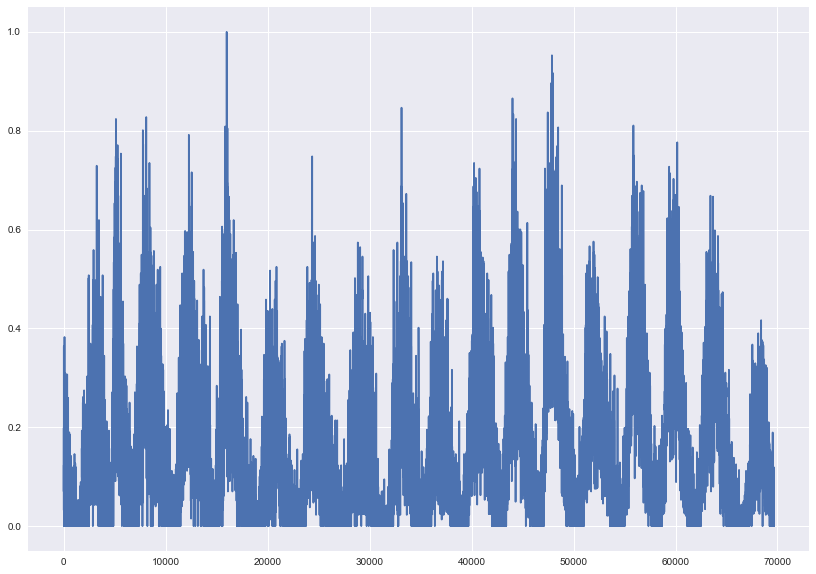

In [18]:
plt.plot(X, mms_y)
plt.show()

In [19]:
#split into train and test sets
train_size = int(len(mms_y) * 0.67)
test_size = len(mms_y) - train_size
train, test = mms_y[0:train_size,:], mms_y[train_size:len(mms_y),:]
print(len(train), len(test))

46664 22985


In [20]:
#simpler way than create_dataset?
def simple_look(dataset, look_back=1):
    dataX = dataset[:-(look_back + 1), 0]
    dataY = dataset[look_back:-1, 0]
    return np.reshape(dataX, (len(dataX), 1)), np.reshape(dataY, (len(dataY), 1))

In [21]:
#reshape into X=t and Y=t+1
look_back = 1
trainXb, trainYb = simple_look(train, look_back)
testXb, testYb = simple_look(test, look_back)

In [22]:
trainXb.shape

(46662, 1)

In [23]:
type(trainXb[1])

numpy.ndarray

In [24]:
#reshape input to be [samples, time steps, features]
trainX = np.reshape(trainXb, (trainXb.shape[0], 1, trainXb.shape[1]))
testX = np.reshape(testXb, (testXb.shape[0], 1, testXb.shape[1]))

In [25]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [27]:
and_i_stop = EarlyStopping(monitor = 'loss', patience = 4, mode = 'auto')
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainYb, epochs=100, callbacks = [and_i_stop], batch_size=1, verbose=2)

Epoch 1/100
302s - loss: 0.0026
Epoch 2/100
301s - loss: 0.0023
Epoch 3/100
314s - loss: 0.0023
Epoch 4/100
308s - loss: 0.0023
Epoch 5/100
301s - loss: 0.0023
Epoch 6/100
316s - loss: 0.0023
Epoch 7/100
300s - loss: 0.0023
Epoch 8/100
305s - loss: 0.0023
Epoch 9/100
302s - loss: 0.0023
Epoch 10/100
307s - loss: 0.0023
Epoch 11/100
300s - loss: 0.0023
Epoch 12/100
302s - loss: 0.0023
Epoch 13/100
300s - loss: 0.0023
Epoch 14/100
306s - loss: 0.0023
Epoch 15/100
302s - loss: 0.0023
Epoch 16/100
300s - loss: 0.0023
Epoch 17/100
332s - loss: 0.0023
Epoch 18/100
336s - loss: 0.0023
Epoch 19/100
321s - loss: 0.0023
Epoch 20/100
300s - loss: 0.0023
Epoch 21/100
319s - loss: 0.0023
Epoch 22/100
337s - loss: 0.0023
Epoch 23/100
341s - loss: 0.0023
Epoch 24/100
338s - loss: 0.0023
Epoch 25/100
335s - loss: 0.0023
Epoch 26/100
344s - loss: 0.0023


In [28]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainYb)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testYb)
#calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 25.31 RMSE
Test Score: 17.91 RMSE


In [29]:
#saving the model
model.save('sunspot_model_c')

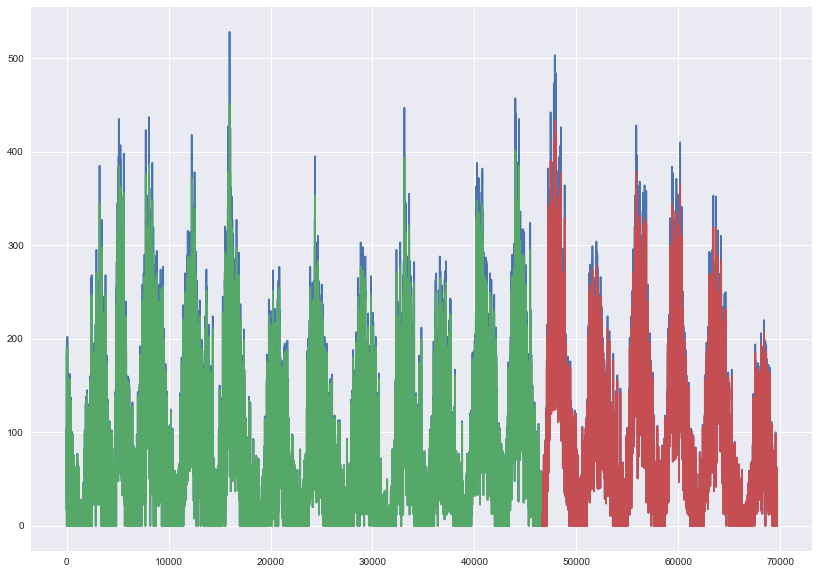

In [30]:
#shift train predictions for plotting
trainPredictPlot = np.empty_like(mms_y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#shift test predictions for plotting
testPredictPlot = np.empty_like(mms_y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(mms_y)-1, :] = testPredict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(mms_y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

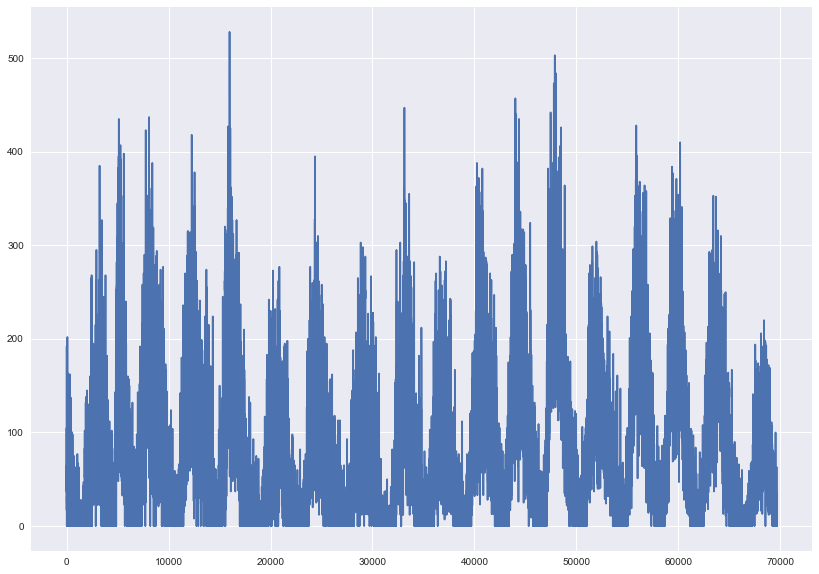

In [31]:
plt.plot(scaler.inverse_transform(mms_y))
plt.show()

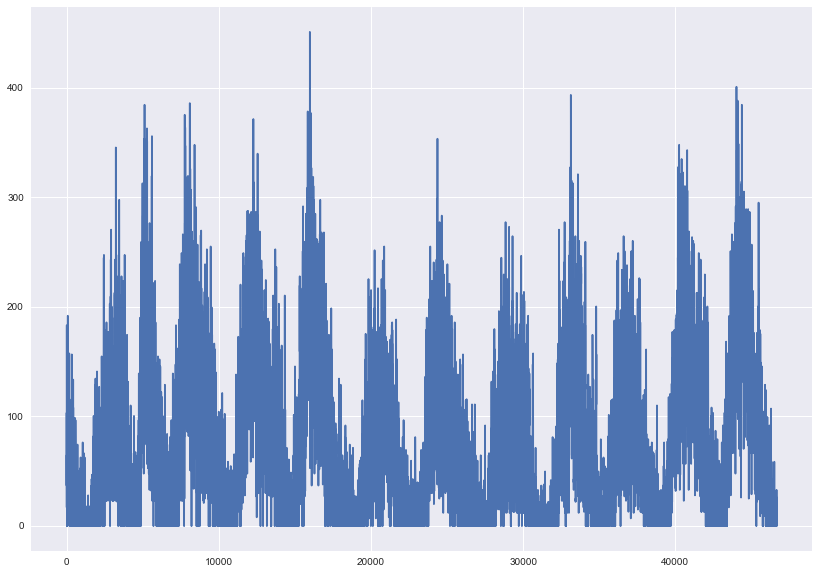

In [32]:
plt.plot(trainPredictPlot)
plt.show()

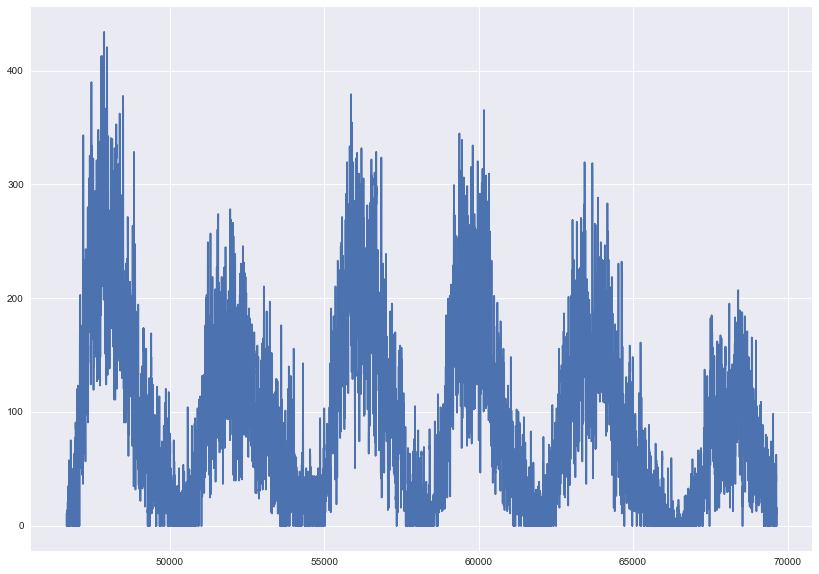

In [33]:
plt.plot(testPredictPlot)
plt.show()

In [34]:
trainPredictPlot[:,0]

array([         nan,  64.39978027,  36.76553345, ...,          nan,
                nan,          nan])

In [35]:
df_sunspot_prediction = pd.DataFrame(data = {'Time_step':X,
                                             'Observed': y, 
                                             'Train_Prediction':trainPredictPlot[:,0], 
                                             'Test_Prediction':testPredictPlot[:,0]},
                                    index = y.index,)

In [36]:
df_sunspot_prediction.head()

,Observed,Test_Prediction,Time_step,Train_Prediction
Date,,,,
1818-01-08,65.0,NaN,0,NaN
1818-01-13,37.0,NaN,1,64.399780
1818-01-17,77.0,NaN,2,36.765533
1818-01-18,98.0,NaN,3,76.135818
1818-01-19,105.0,NaN,4,96.493683


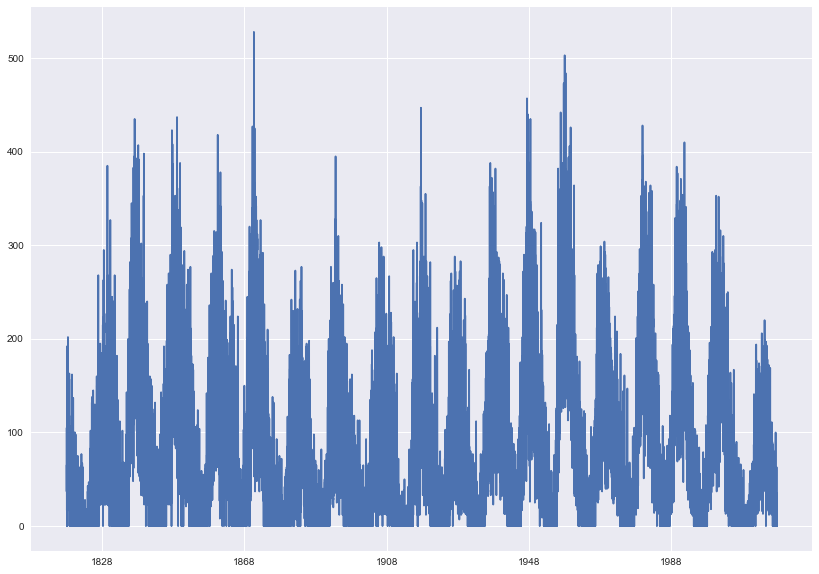

In [37]:
plt.plot(df_sunspot_prediction.index, df_sunspot_prediction.Observed)

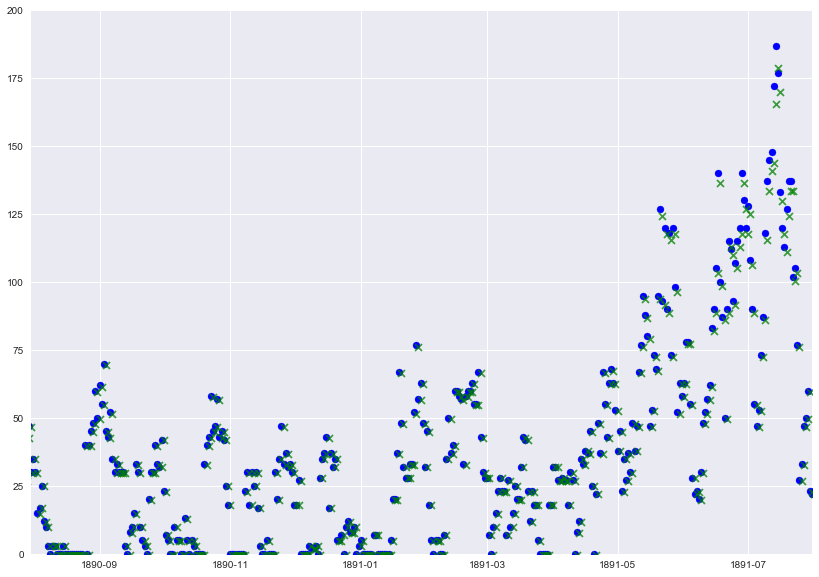

In [38]:
plt.scatter(df_sunspot_prediction.index, df_sunspot_prediction.Observed, 
            c = 'blue')
plt.scatter(df_sunspot_prediction.index, df_sunspot_prediction.Train_Prediction, 
            marker = 'x', c = 'green', alpha = 0.75)
plt.xlim('1890-07-31', '1891-07-31')
plt.ylim(0, 200)
plt.show()

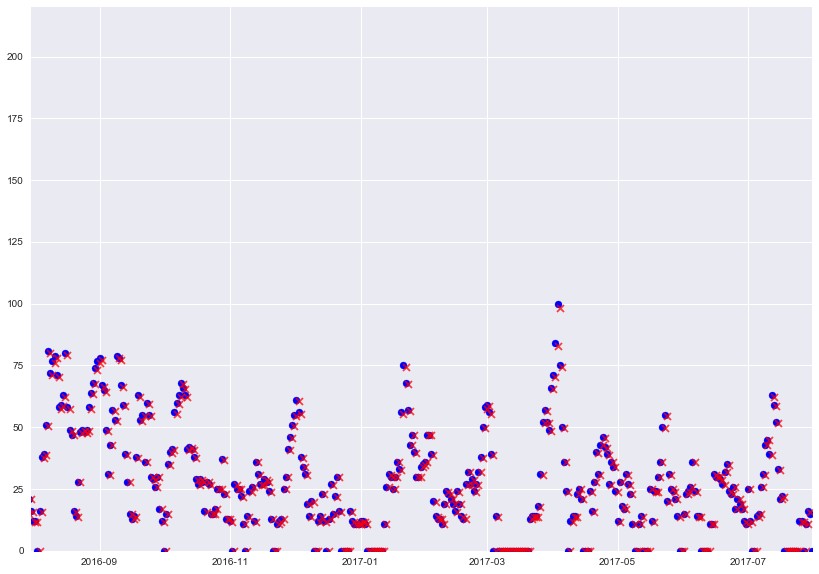

In [39]:
plt.scatter(df_sunspot_prediction.index, df_sunspot_prediction.Observed, 
            c = 'blue')
plt.scatter(df_sunspot_prediction.index, df_sunspot_prediction.Test_Prediction, 
            marker = 'x', c = 'red', alpha = 0.75)
plt.xlim('2016-07-31', '2017-07-31')
plt.ylim(0, 220)
plt.show()

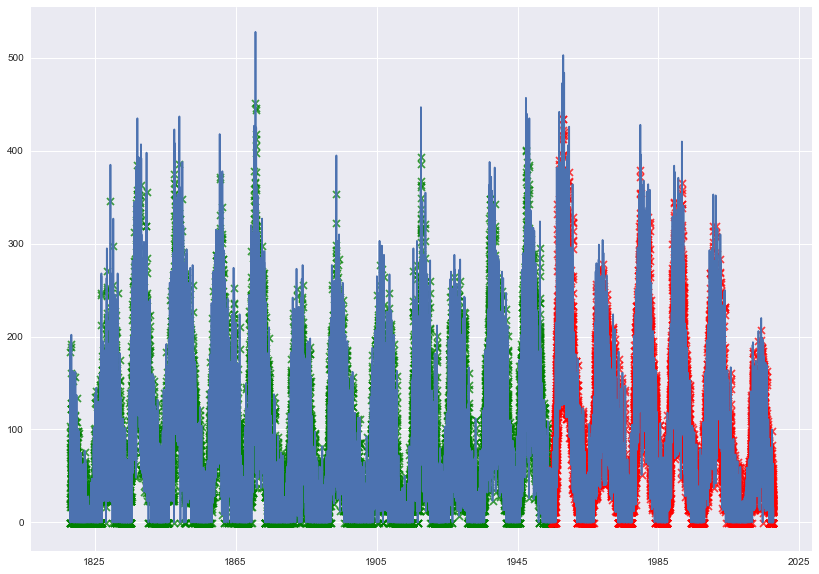

In [40]:
plt.plot(df_sunspot_prediction.index, df_sunspot_prediction.Observed)
plt.scatter(df_sunspot_prediction.index, df_sunspot_prediction.Train_Prediction, 
            marker = 'x', c = 'green', alpha = 0.75)
plt.scatter(df_sunspot_prediction.index, df_sunspot_prediction.Test_Prediction, 
            marker = 'x', c = 'red', alpha = 0.75)
plt.show()